In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler


In [9]:
dengue01 = pd.read_csv('C:/Users/paulo/OneDrive/Área de Trabalho/Dengue Csv/Class/df_total_por_ano.csv')
print(dengue01.head())

anos = dengue01['Ano']
totais = dengue01['Total']

scaler = StandardScaler()
dengue_data_scaled = scaler.fit_transform(dengue01[['Ano', 'Total']])

  Total de casos por ano   Ano  Total
0                 SANTOS  2018    223
1                 SANTOS  2019    764
2                 SANTOS  2020    489
3                 SANTOS  2021   8772
4                 SANTOS  2022    786


In [10]:
pca = PCA(n_components=2)
dengue_pca = pca.fit_transform(dengue_data_scaled)

cov_matrix = np.cov(dengue_data_scaled.T)

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = np.argsort(eigenvalues)[::-1][:2]
top_eigenvalues = eigenvalues[idx]
top_eigenvectors = eigenvectors[:, idx]

In [12]:
dengue_pca_df = pd.DataFrame(data=dengue_pca, columns=['PCA1', 'PCA2'])
dengue_pca_df['Ano'] = anos

In [13]:
cmap = plt.get_cmap('tab20', len(dengue_pca_df['Ano'].unique()))
color_mapping = {year: cmap(i) for i, year in enumerate(dengue_pca_df['Ano'].unique())}

Matriz de Covariância:
[[1.2        0.25398363]
 [0.25398363 1.2       ]]

Autovalores:
[1.45398363 0.94601637]

Autovetores:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Dois maiores autovalores:
[1.45398363 0.94601637]

Dois maiores autovetores:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


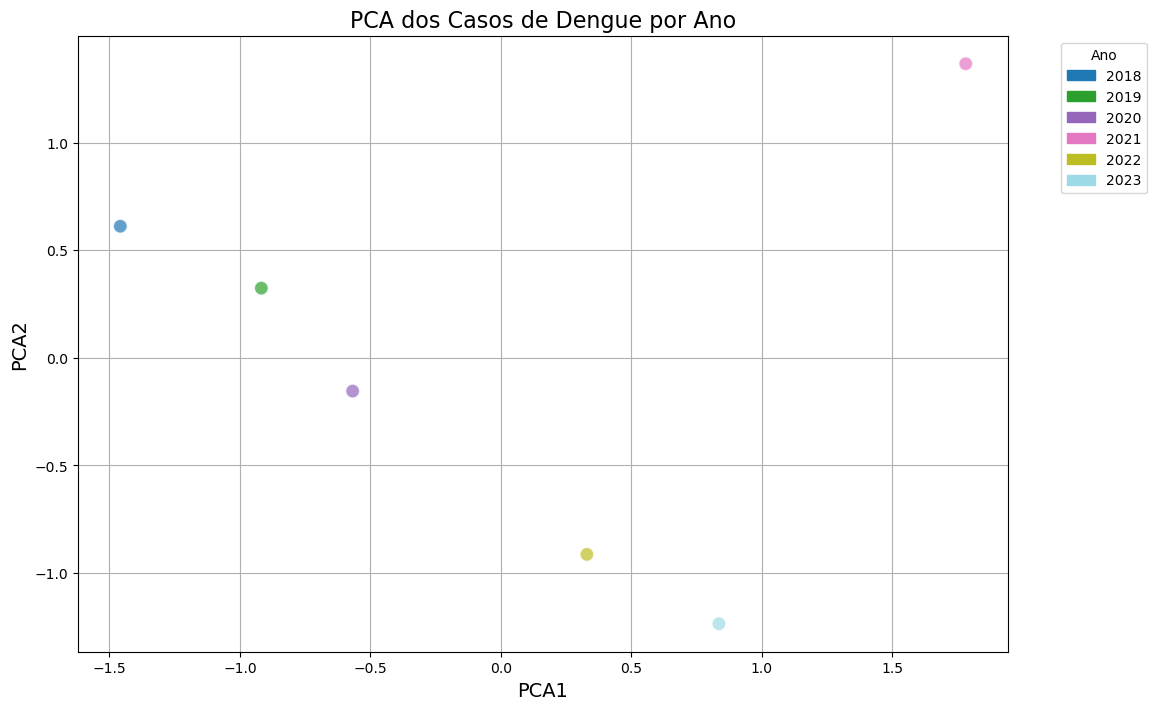

In [14]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(dengue_pca_df['PCA1'], dengue_pca_df['PCA2'], 
                      c=dengue_pca_df['Ano'].apply(lambda x: color_mapping[x]), 
                      alpha=0.7, edgecolors='w', s=100)

plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.title('PCA dos Casos de Dengue por Ano', fontsize=16)

handles = [Patch(color=color, label=year) for year, color in color_mapping.items()]
plt.legend(handles=handles, title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')

print("Matriz de Covariância:")
print(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)
print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

plt.grid(True)
plt.show()